In [1]:
import argparse

import pandas as pd
import numpy as np
import scipy
import re
import gensim
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
data_test= pd.read_csv('data_test.csv')
data_train= pd.read_csv('data_train.csv')

In [3]:
data_train['title vector'] = data_train['title vector'].apply(lambda s: [float(char) for char in s.strip('[]').replace('\n', '').split()])

In [4]:
only_lab = data_train[data_train.label == 0 ]
flat = only_lab['title vector'].values.flatten()

In [5]:
y = np.hstack(flat)

In [6]:
final = y.reshape(-1,300)

In [7]:
only_lab_1 = data_train[data_train.label == 1 ]
flat_1 = only_lab_1['title vector'].values.flatten()
y_1 = np.hstack(flat_1)
final_1 = y_1.reshape(-1,300)

In [8]:
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit(final_1)
print(pca1.explained_variance_ratio_)

[0.78276475 0.04741409]


In [28]:
to_plot1 = pca1.fit_transform(final_1)
pca = PCA(n_components=2)
principalComponents = pca.fit(final)
to_plot = pca.fit_transform(final)

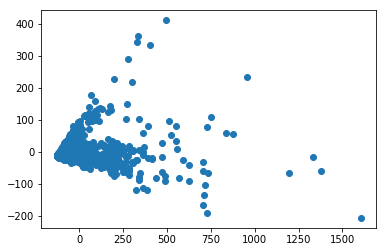

In [10]:
plt.scatter(to_plot1[:,0],to_plot1[:,1])
plt.show()

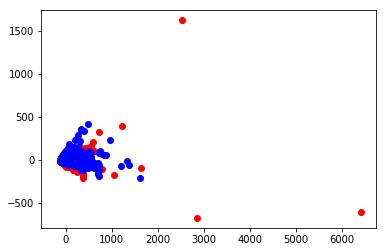

In [29]:
plt.scatter(to_plot[:,0],to_plot[:,1],color='red')
plt.scatter(to_plot1[:,0],to_plot1[:,1],color='blue')
plt.show()

In [12]:
from gensim import *

In [13]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)  


In [21]:
vector = final.mean(0)

In [23]:
word2vec_model.similar_by_vector(vector, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7613553404808044),
 ('kidney_urologic', 0.7513688206672668),
 ('fusion_enhancers', 0.7506022453308105),
 ('insulin_secreting_beta', 0.74973464012146),
 ('glial_tumors', 0.7488193511962891),
 ('PLX_STROKE_targeting', 0.7476974725723267),
 ('left_ventricular_diastolic', 0.7473434209823608),
 ('Umbilical_cord_stem_cells', 0.746474027633667),
 ('GRNOPC1_contains', 0.7452975511550903),
 ('Genetic_predisposition', 0.7444046139717102)]

In [24]:
vector1 = final_1.mean(0)
word2vec_model.similar_by_vector(vector1, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7621950507164001),
 ('left_ventricular_diastolic', 0.7544535994529724),
 ('fibrin_deposition', 0.7519103288650513),
 ('transfusion_syndrome', 0.7502554655075073),
 ('lung_epithelium', 0.7492497563362122),
 ('colorectal_adenoma', 0.7491941452026367),
 ('glial_tumors', 0.7482448816299438),
 ('Genetic_predisposition', 0.7472314834594727),
 ('PLX_STROKE_targeting', 0.7470422983169556),
 ('kidney_urologic', 0.7433282732963562)]

In [41]:
diff = vector - vector1

In [49]:
word2vec_model.similar_by_vector(diff, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ky.Busch_##-###', 0.4184413552284241),
 ('E.Sadler_###-###', 0.417176216840744),
 ('J.McMurray_###-###', 0.40383100509643555),
 ('M.Kenseth_###-###', 0.40283605456352234),
 ('T.Stewart_##-###', 0.3899403214454651),
 ('http://www.ticketmaster.com_###-###-####', 0.38835638761520386),
 ('K.Kahne_###-###', 0.3876754641532898),
 ('Nasdaq_NASDAQ_TRIN', 0.37545692920684814),
 ('Marisa_Lenhard_CFA', 0.36075735092163086),
 ('By_BARRY_RUBIN', 0.3582289218902588)]

In [197]:
pca = PCA(n_components=2)
principalComponents = pca.fit(final)

In [198]:
print(pca.explained_variance_ratio_)  

[0.86971972 0.05680087]


In [200]:
to_plot = pca.fit_transform(final)